In [ ]:
# Análisis de la columna: maximum_nights

# Aquí puedes agregar tu análisis para la columna 'maximum_nights'

Maximum_nights
 - Tipo de dato
 - Cantidad de nulos
 - Cantidad de Vacios
 - Cantidad de datos unicos
 - Cantidad de datos totales

In [4]:
import pandas as pd

# Cargar únicamente la columna 'Review_scores_accuracy' del archivo CSV
file_path = "../0_Dataset/Listings.csv"
data = pd.read_csv(file_path, usecols=['maximum_nights'], delimiter=',', encoding='latin-1')

# Verificar si la columna 'Review_scores_accuracy' existe en el DataFrame
if 'maximum_nights' in data.columns:
    # Tipo de dato
    tipo_dato = data['maximum_nights'].dtype
    
    # Cantidad de nulos
    cantidad_nulos = data['maximum_nights'].isna().sum()
    
    # Cantidad de vacíos (considerando cadenas vacías)
    cantidad_vacios = (data['maximum_nights'] == '').sum()
    
    # Cantidad de datos únicos
    cantidad_unicos = data['maximum_nights'].nunique()
    
    # Cantidad de datos totales
    cantidad_totales = data['maximum_nights'].shape[0]
    
    # Imprimir resultados
    print(f"Columna 'maximum_nights':")
    print(f" - Tipo de dato: {tipo_dato}")
    print(f" - Cantidad de nulos: {cantidad_nulos}")
    print(f" - Cantidad de vacíos: {cantidad_vacios}")
    print(f" - Cantidad de datos únicos: {cantidad_unicos}")
    print(f" - Cantidad de datos totales: {cantidad_totales}")
else:
    print("La columna 'maximum_nights' no existe en el DataFrame.")

print(data['maximum_nights'].value_counts())
print(data['maximum_nights'].unique())

Columna 'maximum_nights':
 - Tipo de dato: int64
 - Cantidad de nulos: 0
 - Cantidad de vacíos: 0
 - Cantidad de datos únicos: 508
 - Cantidad de datos totales: 279712
maximum_nights
1125    157596
30       20449
365      15659
90        8165
60        6368
         ...  
728          1
285          1
495          1
2800         1
517          1
Name: count, Length: 508, dtype: int64
[      1125        120         29         14        365        999
          4         30         27          3         31         90
         28          7        180          2         10         40
         60          5         65         26        730         25
          1         13        364         42         21        200
         20       1124        100         15        105          6
         99      50000       1000         32        300        160
        150         70        250         37         12         80
         45        125       1115         55        123        360
         5

Analisis Cuantitaivo:
* Promedio
* Min
* Max
* Desviacion Estandar
* Q1
* Q2
* Q3
* Q4
* Mediana
* Kurtosis
* Skewness

ANALISIS CUANTITATIVOS A ESCALA REAL ELIMINANDO NULOS

In [5]:
# Cantidad de filas antes de aplicar dropna
total_antes = data['maximum_nights'].shape[0]

# Filtrar valores válidos
valores_validos = data['maximum_nights'].dropna()

# Cantidad de filas después de aplicar dropna
total_despues = valores_validos.shape[0]

# Calcular cuántos valores se dropearon
valores_dropeados = total_antes - total_despues

# Imprimir el resultado
print(f"Cantidad de valores eliminados (dropeados): {valores_dropeados}")

if not valores_validos.empty:
    # Cálculo de estadísticas sin transformar a escala relativa
    promedio = valores_validos.mean()
    minimo = valores_validos.min()
    maximo = valores_validos.max()
    desviacion = valores_validos.std()
    varianza = valores_validos.var()
    q1 = valores_validos.quantile(0.25)
    q2 = valores_validos.quantile(0.50)  # Mediana
    q3 = valores_validos.quantile(0.75)
    q4 = valores_validos.quantile(1.0)
    mediana = valores_validos.median()
    kurtosis = valores_validos.kurtosis()
    skewness = valores_validos.skew()

    # Mostrar resultados
    print("\nAnálisis Cuantitativo de 'maximum_nights':")
    print(f" - Promedio: {promedio:.2f}")
    print(f" - Mínimo: {minimo}")
    print(f" - Máximo: {maximo}")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Varianza: {varianza:.2f}")
    print(f" - Q1 (25%): {q1}")
    print(f" - Q2 / Mediana (50%): {q2}")
    print(f" - Q3 (75%): {q3}")
    print(f" - Q4 (100%): {q4}")
    print(f" - Mediana: {mediana}")
    print(f" - Curtosis (Kurtosis): {kurtosis:.4f}")
    print(f" - Asimetría (Skewness): {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar un análisis cuantitativo.")

Cantidad de valores eliminados (dropeados): 0

Análisis Cuantitativo de 'maximum_nights':
 - Promedio: 27558.60
 - Mínimo: 1
 - Máximo: 2147483647
 - Desviación estándar: 7282875.16
 - Varianza: 53040270629878.36
 - Q1 (25%): 45.0
 - Q2 / Mediana (50%): 1125.0
 - Q3 (75%): 1125.0
 - Q4 (100%): 2147483647.0
 - Mediana: 1125.0
 - Curtosis (Kurtosis): 82346.3841
 - Asimetría (Skewness): 284.2207


ANALISIS CUANTITATIVO ELIMINANDO OUTLIERS Y 0 SIN PONER LIMITES

In [6]:
# 1. Filtrar valores válidos: eliminar nulos y valores 0
valores_validos = data['maximum_nights'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# 2. Cálculo de IQR y límites
q1 = valores_validos.quantile(0.25)
q3 = valores_validos.quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# 3. Identificar outliers
outliers = valores_validos[(valores_validos < limite_inferior) | (valores_validos > limite_superior)]
cantidad_outliers = outliers.shape[0]

# 4. Eliminar outliers
valores_sin_outliers = valores_validos[(valores_validos >= limite_inferior) & (valores_validos <= limite_superior)]

# 5. Calcular estadísticas descriptivas sin outliers
if not valores_sin_outliers.empty:
    promedio = valores_sin_outliers.mean()
    minimo = valores_sin_outliers.min()
    maximo = valores_sin_outliers.max()
    desviacion = valores_sin_outliers.std()
    q1 = valores_sin_outliers.quantile(0.25)
    q2 = valores_sin_outliers.quantile(0.50)
    q3 = valores_sin_outliers.quantile(0.75)
    varianza = valores_sin_outliers.var()
    kurtosis = valores_sin_outliers.kurtosis()
    skewness = valores_sin_outliers.skew()

    # 6. Mostrar resultados
    print(f"Cantidad de outliers detectados: {cantidad_outliers}\n")
    print("Análisis Cuantitativo de 'maximum_nights' (escala natural, sin outliers):")
    print(f" - Promedio: {promedio:.2f}")
    print(f" - Mínimo: {minimo}")
    print(f" - Máximo: {maximo}")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Q1 (25%): {q1}")
    print(f" - Q2 / Mediana (50%): {q2}")
    print(f" - Q3 (75%): {q3}")
    print(f" - Varianza: {varianza:.4f}")
    print(f" - Curtosis (Kurtosis): {kurtosis:.4f}")
    print(f" - Asimetría (Skewness): {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar el análisis.")


Cantidad de outliers detectados: 64

Análisis Cuantitativo de 'maximum_nights' (escala natural, sin outliers):
 - Promedio: 691.07
 - Mínimo: 1
 - Máximo: 2500
 - Desviación estándar: 513.10
 - Q1 (25%): 45.0
 - Q2 / Mediana (50%): 1125.0
 - Q3 (75%): 1125.0
 - Varianza: 263274.7944
 - Curtosis (Kurtosis): -1.7815
 - Asimetría (Skewness): -0.3827


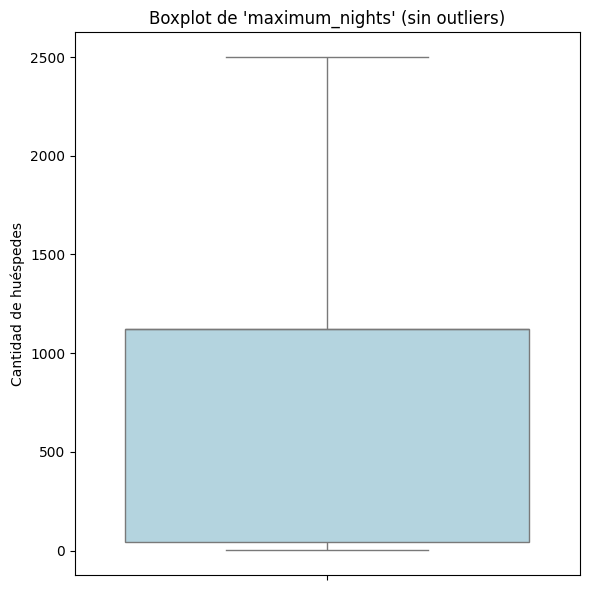

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reutilizamos los datos filtrados (sin nulos, sin ceros, sin outliers)
valores_validos = data['maximum_nights'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# Cálculo del IQR
q1 = valores_validos.quantile(0.25)
q3 = valores_validos.quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Eliminar outliers
valores_sin_outliers = valores_validos[(valores_validos >= limite_inferior) & (valores_validos <= limite_superior)]

# Crear el boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(y=valores_sin_outliers, color="lightblue")
plt.title("Boxplot de 'maximum_nights' (sin outliers)")
plt.ylabel("Cantidad de huéspedes")
plt.tight_layout()
plt.show()


ANALISIS PONIENDO UN LIMITE SUPERIOR DE 365 DIAS Y ANALIZANDO LOS VALORES QUE SEAN MAYOR A 0 

In [8]:
valores_validos = data['maximum_nights'].dropna()
valores_validos = valores_validos[valores_validos > 0]


In [9]:
valores_filtrados = valores_validos[valores_validos <= 365]


In [10]:
# 1. Filtrar nulos y valores 0
valores_validos = data['maximum_nights'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# 2. Filtrar por un máximo lógico de 365 noches
valores_filtrados = valores_validos[valores_validos <= 365]

# 3. Análisis descriptivo con valores filtrados
if not valores_filtrados.empty:
    promedio = valores_filtrados.mean()
    minimo = valores_filtrados.min()
    maximo = valores_filtrados.max()
    desviacion = valores_filtrados.std()
    varianza = valores_filtrados.var()
    q1 = valores_filtrados.quantile(0.25)
    q2 = valores_filtrados.quantile(0.50)
    q3 = valores_filtrados.quantile(0.75)
    kurtosis = valores_filtrados.kurtosis()
    skewness = valores_filtrados.skew()

    print("Análisis Cuantitativo de 'maximum_nights' (filtrado ≤ 365 días):")
    print(f" - Promedio: {promedio:.2f}")
    print(f" - Mínimo: {minimo}")
    print(f" - Máximo: {maximo}")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Varianza: {varianza:.2f}")
    print(f" - Q1: {q1}")
    print(f" - Q2 / Mediana: {q2}")
    print(f" - Q3: {q3}")
    print(f" - Curtosis: {kurtosis:.4f}")
    print(f" - Asimetría: {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar el análisis.")


Análisis Cuantitativo de 'maximum_nights' (filtrado ≤ 365 días):
 - Promedio: 94.11
 - Mínimo: 1
 - Máximo: 365
 - Desviación estándar: 122.52
 - Varianza: 15011.21
 - Q1: 18.0
 - Q2 / Mediana: 30.0
 - Q3: 90.0
 - Curtosis: 0.6787
 - Asimetría: 1.5164


In [11]:
# Identificar los registros eliminados por el filtro (> 365)
eliminados = valores_validos[valores_validos > 365]

# Mostrar cuántos son
print(f"Cantidad de registros eliminados (maximum_nights > 365): {eliminados.shape[0]}")

# Opcional: ver los valores más comunes entre los eliminados
print("\nFrecuencia de valores eliminados:")
print(eliminados.value_counts().head(10))


Cantidad de registros eliminados (maximum_nights > 365): 163208

Frecuencia de valores eliminados:
maximum_nights
1125    157596
1124      1788
1000       643
999        515
730        394
500        300
400        213
366        210
1123       145
367        134
Name: count, dtype: int64
